In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "../Data/coffee/total-production.csv"
coffee_production = pd.read_csv(path).T

coffee_production.columns = coffee_production.iloc[0]
coffee_production = coffee_production.drop('total_production')

# Coffee Production Stats

* Create a bar chart of the top 10 coffee producers by total production in 'total-production.csv', sorted from highest to lowest. Change the xticks to two letter country abbreviations.


* Data Prep Code

<mark style="background-color: #000000"> coffee_production = pd.read_csv("coffee/total-production.csv").T </mark> 

<mark style="background-color: #000000"> coffee_production.columns = coffee_production.iloc[0] </mark> 

<mark style="background-color: #000000"> coffee_production = coffee_production.drop("total_production") </mark> 


In [3]:
coffee_production.tail()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
2014,39.405,99.8766,53304.7669,247.55,644.0112,10946.2773,501.4544,24.7098,797.5642,20.0725,...,106.2169,46.4478,35.7018,844.8871,143.2417,12.0013,3744.477,650.3983,26499.8404,178.3814
2015,40.515,84.2191,52870.5876,274.1017,644.4926,12585.4751,425.2061,21.2015,711.9818,20.0,...,127.0784,45.9276,36.1933,761.9808,80.9232,11.7897,3649.567,500.1259,28736.5941,156.246
2016,44.83,77.9835,56788.1784,248.7933,644.8845,11541.0266,420.8227,19.516,1171.1449,20.0101,...,120.1902,37.9217,36.7161,537.5435,23.2772,11.7911,4962.158,525.0,25540.2932,143.4533
2017,35.006,83.8112,52739.8635,202.1079,623.5744,10852.3153,408.7848,14.4703,733.9382,20.0024,...,104.5621,37.9464,36.7829,638.2325,114.7158,12.0009,4596.813,571.5128,27887.6555,132.1281
2018,40.3874,82.5687,62924.8836,178.4206,601.0001,9417.5942,396.3764,12.8493,930.369,20.0135,...,130.3021,30.9901,36.0659,482.0069,74.3319,12.3647,4703.964,525.2602,31174.0742,106.0735


In [4]:
coffee_production.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1990 to 2018
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Angola                            29 non-null     object
 1   Bolivia (Plurinational State of)  29 non-null     object
 2   Brazil                            29 non-null     object
 3   Burundi                           29 non-null     object
 4   Ecuador                           29 non-null     object
 5   Indonesia                         29 non-null     object
 6   Madagascar                        29 non-null     object
 7   Malawi                            29 non-null     object
 8   Papua New Guinea                  29 non-null     object
 9   Paraguay                          29 non-null     object
 10  Peru                              29 non-null     object
 11  Rwanda                            29 non-null     object
 12  Timor-Leste             

In [9]:
top10_producers = coffee_production.sum().sort_values(ascending=False).iloc[:10]

top10_producers

total_production
Brazil       1190965.7353
Viet Nam      439540.9519
Colombia      345871.4464
Indonesia     245116.7707
Ethiopia      141542.8931
India          132025.681
Mexico        126908.2467
Guatemala     113401.0702
Honduras      105456.5888
Uganda          93146.369
dtype: object

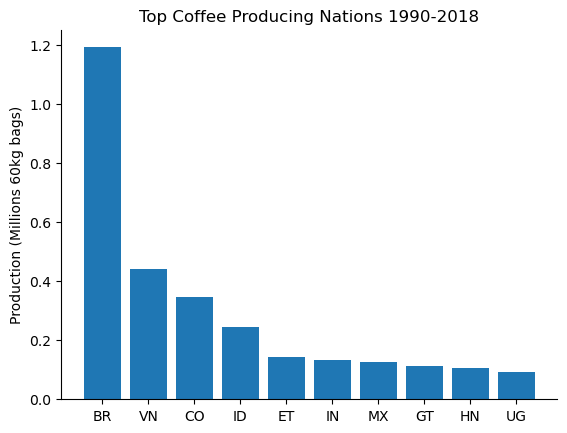

In [6]:
# Solution 1

fig, ax = plt.subplots()

labels = ['BR', 'VN', 'CO', 'ID', 'ET', 'IN', 'MX', 'GT', 'HN', 'UG']

ax.bar(x=labels, height=top10_producers.values / 1000000)

ax.set_title('Top Coffee Producing Nations 1990-2018')
ax.set_ylabel('Production (Millions 60kg bags)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

# Top 5 over time

* Create a line chart with the top 5 nations over time. Make sure to include a legend! Consider converting the index to datetime64[ns].

In [7]:
top5 = coffee_production.loc[:, ['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia']]

top5.index = top5.index.astype('datetime64[ns]')

top5.head()

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia
1990-01-01,27285.6286,1310.288,14396.0,7441.383,2909.451
1991-01-01,27293.4934,1437.848,17980.397,8493.196,2924.664
1992-01-01,34603.3542,2340.447,14946.878,5569.478,1825.171
1993-01-01,28166.9786,3020.216,11422.422,6743.288,2967.004
1994-01-01,28192.047,3631.609,12964.0,5367.878,2762.73


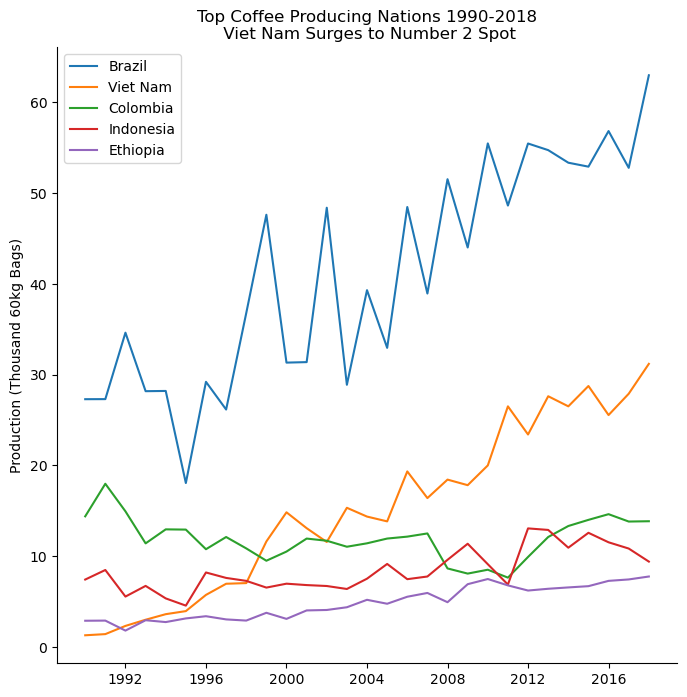

In [8]:
# Solution 1

fig, ax = plt.subplots(figsize=(8, 8))

for column in top5.columns:
    ax.plot(top5[column] / 1000)
    
ax.set_title('Top Coffee Producing Nations 1990-2018\n Viet Nam Surges to Number 2 Spot')
ax.set_ylabel('Production (Thousand 60kg Bags)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    
ax.legend(top5.columns)
plt.show()

# COMPOSITION OVER TIME

Our client is interested in looking at how Brazil's share of global coffee production has changed over time.

Build a plot that global total production as well as Brazil's contribution to global production over time.

In [9]:
brazil_vs_others = (coffee_production
 .assign(rest_of_world = coffee_production.loc[:, ~(coffee_production.columns.isin(['Brazil']))].sum(axis=1))
 .loc[:, ['Brazil', 'rest_of_world']]
 .astype({"Brazil": "float64"})
)

In [10]:
brazil_vs_others.head()

total_production,Brazil,rest_of_world
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.0470,65121.147


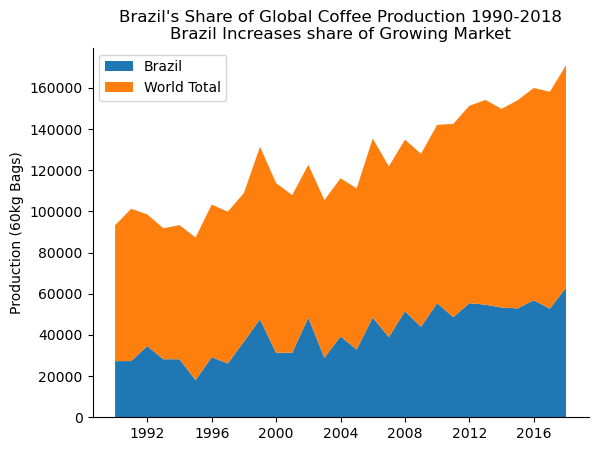

In [11]:
# Solution 1

fig, ax = plt.subplots()

labels = ['Brazil', 'World Total']

ax.stackplot(
    brazil_vs_others.index, 
    brazil_vs_others['Brazil'], 
    brazil_vs_others['rest_of_world'], 
    labels=labels
)

ax.set_title("Brazil's Share of Global Coffee Production 1990-2018\nBrazil Increases share of Growing Market")
ax.set_ylabel('Production (60kg Bags)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(brazil_vs_others.index[2::4])

ax.legend(loc='upper left')
plt.show()

## PRODUCTION RELATIONSHIPS

We want to explore how Brazil compares to its competitors in terms of production. Build a scatterplot  comparing Brazil Vs. VietNam Production and one comparing Brazil to Venezuela.

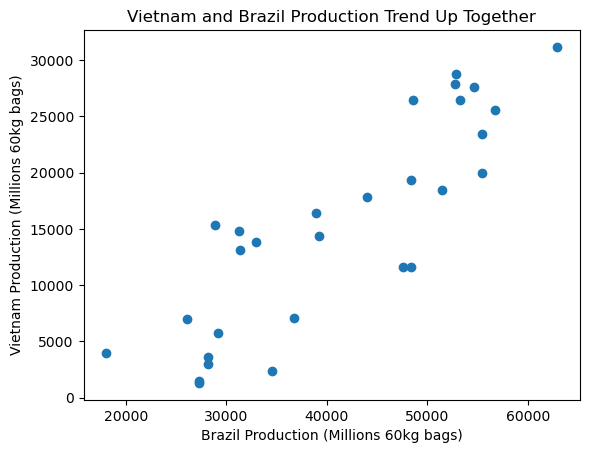

In [12]:
# Solution 1: Brazil vs. Vietnam

fig, ax = plt.subplots()

ax.scatter(
    coffee_production['Brazil'], 
    coffee_production['Viet Nam']
)

ax.set_title('Vietnam and Brazil Production Trend Up Together')
ax.set_ylabel('Vietnam Production (Millions 60kg bags)')
ax.set_xlabel('Brazil Production (Millions 60kg bags)')

plt.show()

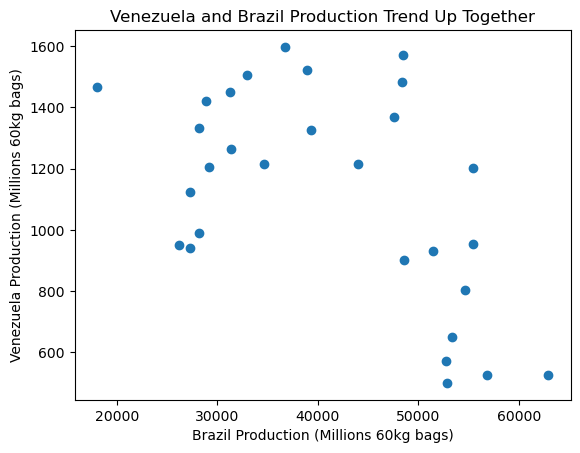

In [13]:
# Solution 2: Brazil vs Venezuela

fig, ax = plt.subplots()

ax.scatter(
    coffee_production['Brazil'], 
    coffee_production['Venezuela']
)

ax.set_title('Venezuela and Brazil Production Trend Up Together')
ax.set_ylabel('Venezuela Production (Millions 60kg bags)')
ax.set_xlabel('Brazil Production (Millions 60kg bags)')

plt.show()

# COMPOSITION OF COFFEE PRODUCTION

* Create a Pie chart with the top 5 producers, as well as the sum for the rest of countries.

* Finally, create two donut charts, one representing Brazil's share of global production in 1990, and one for Brazil's share in 2018.

In [14]:
coffee_production_top5_2018 = (coffee_production
 .assign(
     rest_of_world = coffee_production
     .loc[:, ~(coffee_production.columns.isin(['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia']))]
     .sum(axis=1))
 .loc['2018', ['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia', 'rest_of_world']]
)

coffee_production_top5_2018

total_production
Brazil           62924.8836
Viet Nam         31174.0742
Colombia          13857.962
Indonesia         9417.5942
Ethiopia          7776.2234
rest_of_world    45786.0003
Name: 2018, dtype: object

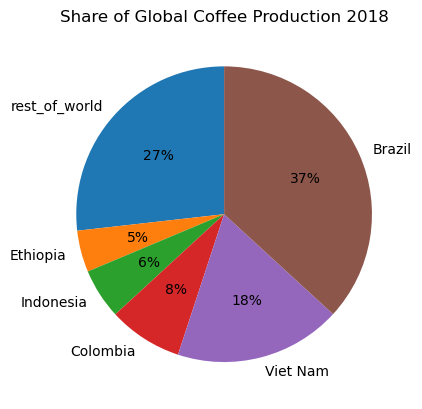

In [15]:
# Solution 1

fig, ax = plt.subplots()

ax.pie(
    coffee_production_top5_2018.values[::-1], 
    startangle=90, 
    labels=coffee_production_top5_2018.index[::-1], 
    autopct="%.0f%%"
)

ax.set_title('Share of Global Coffee Production 2018')

plt.show()

In [16]:
brazil_vs_others = (coffee_production
 .assign(
     rest_of_world = coffee_production
     .loc[:, ~(coffee_production.columns.isin(['Brazil']))]
     .sum(axis=1))
.astype({'Brazil':'float64'})
.loc[:, ['Brazil', 'rest_of_world']]
)

brazil_vs_others.head()

total_production,Brazil,rest_of_world
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.0470,65121.147


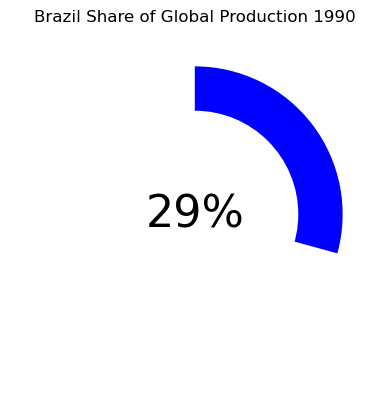

In [17]:
# Solution 2

fig, ax = plt.subplots()

ax.pie(brazil_vs_others.iloc[0].sort_values(ascending=False), 
       startangle=90, 
       labels=['', ''], 
#        autopct='%.0f%%',
#        pctdistance=.85,
       colors=['white', 'blue'], 
      )

# Adding Circle in Pie chart
hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(hole)

plt.text(
    0, 
    0, 
    f"{round(brazil_vs_others.loc['1990', 'Brazil'] / brazil_vs_others.loc['1990'].sum() * 100)}%", 
    ha='center', 
    va='center', 
    fontsize=32
)

ax.set_title('Brazil Share of Global Production 1990')

plt.show()

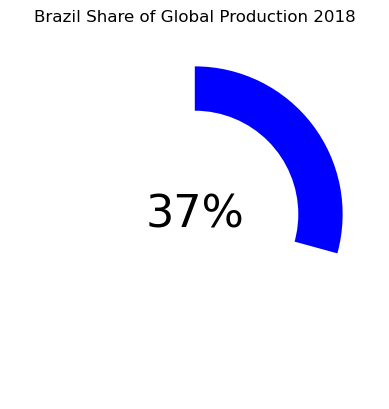

In [18]:
# Solution 3

fig, ax = plt.subplots()

ax.pie(brazil_vs_others.iloc[0].sort_values(ascending=False), 
       startangle=90, 
       labels=['', ''], 
#        autopct='%.0f%%',
#        pctdistance=.85,
       colors=['white', 'blue'], 
      )

# Adding Circle in Pie chart
hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(hole)

plt.text(
    0, 
    0, 
    f"{round(brazil_vs_others.loc['2018', 'Brazil'] / brazil_vs_others.loc['2018'].sum() * 100)}%", 
    ha='center', 
    va='center', 
    fontsize=32
)

ax.set_title('Brazil Share of Global Production 2018')

plt.show()

# Coffee Consumption Vs. Prices

Compare coffee prices with coffee consumption in the following countries. 

Is there a relationship between coffee consumption and the price these countries pay?

Plot a dual axis bar chart of price vs consumption totals for these countries.

In [19]:
consumption = pd.read_csv("../data/coffee/imports.csv", index_col='imports').mean(axis=1)

consumption.name = 'imports'

consumption.head()

imports
   Austria               1551.083333
   Belgium               4639.533333
   Belgium/Luxembourg    2329.444444
   Bulgaria               397.250000
   Croatia                349.136364
Name: imports, dtype: float64

In [20]:
prices = pd.read_csv("../data/coffee/retail-prices.csv", index_col='retail_prices').mean(axis=1)

prices.name = 'prices'

prices.head()

retail_prices
   Austria    11.571135
   Cyprus     10.437695
   Denmark    10.494025
   Finland     7.211692
   France      6.850879
Name: prices, dtype: float64

In [21]:
price_consumption = (pd.DataFrame(consumption)
 .merge(
     prices, 
     how='inner', 
     left_on=consumption.index, 
     right_on=prices.index)
)

price_consumption.columns = ['country', 'import', 'price']

price_consumption['country'] = price_consumption['country'].str.strip(' ')
price_consumption.sort_values('import', ascending=False, inplace=True)

In [22]:
price_consumption

,country,import,price
5,Germany,16357.666667,9.515110
11,Japan,6862.275235,21.472939
6,Italy,6696.958333,14.199589
4,France,6512.458333,6.850879
9,Spain,4046.291667,8.029992
7,Netherlands,2928.125000,8.931263
10,Sweden,1620.625000,8.054350
0,Austria,1551.083333,11.571135
3,Finland,1157.541667,7.211692
2,Denmark,991.791667,10.494025


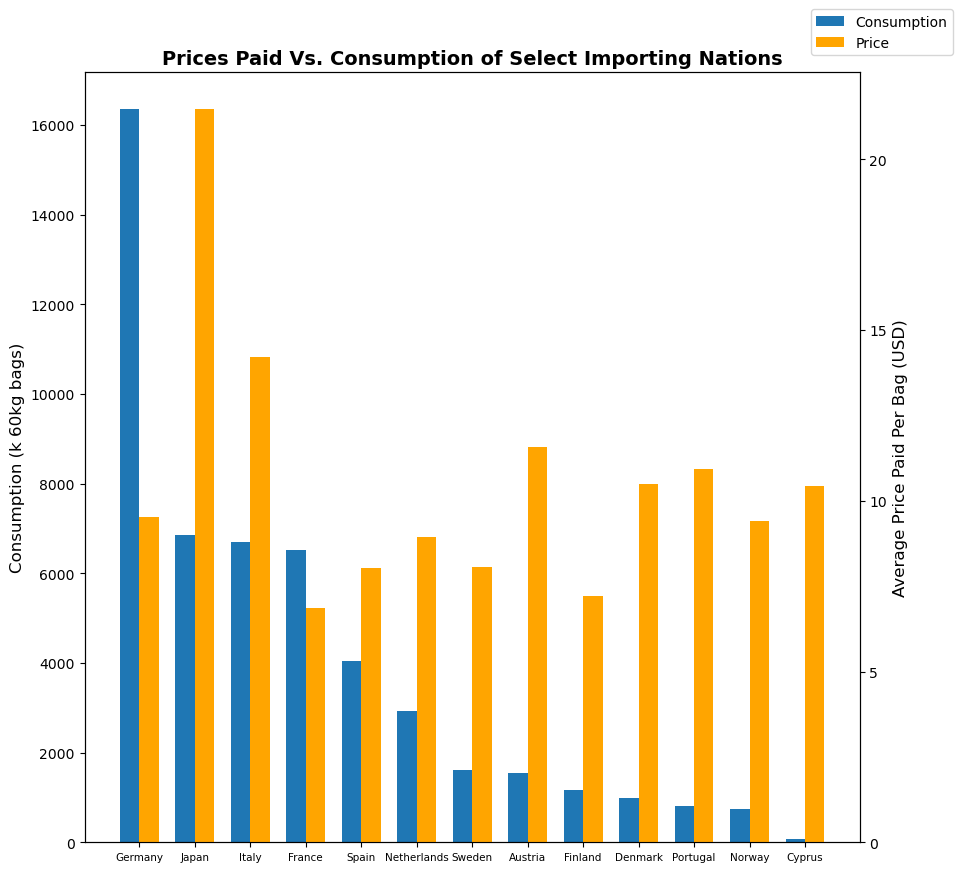

In [56]:
# Solution 1

fig, ax = plt.subplots(figsize=(10, 10))

width = .35
x = np.arange(len(price_consumption))

ax.bar(
    x-width/2, 
    price_consumption['import'], 
    width=width, 
    label='Consumption'
)

ax.set_title("Prices Paid Vs. Consumption of Select Importing Nations", fontsize=14, fontweight='bold')
ax.set_ylabel("Consumption (k 60kg bags)", fontsize=12)

ax2 = ax.twinx()

ax2.bar(
    x+width/2, 
    price_consumption['price'], 
    width=width, 
    label='Price', 
    color='orange'
)

ax2.set_ylabel("Average Price Paid Per Bag (USD)", fontsize=12)

ax.set_xticks(x)
ax.set_xticklabels(price_consumption['country'], fontsize=7.5)

fig.legend(bbox_to_anchor=(1, 0.95))
plt.show()